In [51]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# model
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn import datasets

dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [53]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [54]:
print(dataset.target_names)

['malignant' 'benign']


In [55]:
print(dataset.data[0:2])
print(dataset.target[0:2])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
[0 0]


In [56]:
print(dataset.data[284:286])
print(dataset.target[284:286])

[[1.289e+01 1.570e+01 8.408e+01 5.166e+02 7.818e-02 9.580e-02 1.115e-01
  3.390e-02 1.432e-01 5.935e-02 2.913e-01 1.389e+00 2.347e+00 2.329e+01
  6.418e-03 3.961e-02 7.927e-02 1.774e-02 1.878e-02 3.696e-03 1.390e+01
  1.969e+01 9.212e+01 5.956e+02 9.926e-02 2.317e-01 3.344e-01 1.017e-01
  1.999e-01 7.127e-02]
 [1.258e+01 1.840e+01 7.983e+01 4.890e+02 8.393e-02 4.216e-02 1.860e-03
  2.924e-03 1.697e-01 5.855e-02 2.719e-01 1.350e+00 1.721e+00 2.245e+01
  6.383e-03 8.008e-03 1.860e-03 2.924e-03 2.571e-02 2.015e-03 1.350e+01
  2.308e+01 8.556e+01 5.641e+02 1.038e-01 6.624e-02 5.579e-03 8.772e-03
  2.505e-01 6.431e-02]]
[1 1]


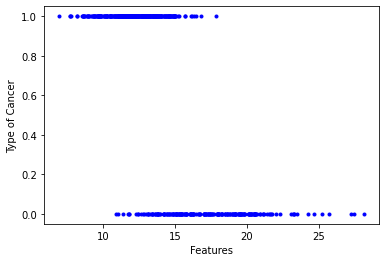

In [57]:
# 0 for benign and 1 for malignant

plt.scatter(dataset.data[:, 0], dataset.target, c='blue', marker='.')
plt.xlabel('Features')
plt.ylabel('Type of Cancer')
plt.show()

In [58]:

# creating a model
kmeans = KMeans(n_clusters = 7, random_state = 57)

# prediction
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

[1 1 3 6 3 2 3 2 2 6 5 5 5 2 2 2 5 5 1 2 6 0 2 1 1 5 2 3 5 5 3 2 5 3 5 5 2
 6 2 2 2 6 3 2 2 3 0 2 6 2 6 6 6 5 2 6 1 2 6 0 0 0 2 0 2 2 0 6 0 6 3 0 3 2
 6 5 6 3 3 6 6 6 4 5 6 3 2 3 6 2 2 2 2 2 2 3 6 0 6 2 2 0 6 0 0 2 6 6 1 6 0
 6 2 0 0 6 0 5 5 5 6 3 1 2 6 2 2 3 2 3 6 5 5 2 3 6 6 6 2 0 0 5 6 6 0 6 6 2
 2 2 6 0 0 0 6 6 5 5 6 6 6 3 1 6 1 2 0 5 3 2 6 2 5 0 0 0 0 5 6 6 4 1 5 6 2
 0 5 6 6 6 2 6 0 2 2 6 2 5 3 2 6 5 1 5 6 2 0 5 6 2 3 6 4 5 2 2 6 0 1 1 2 2
 0 5 2 2 0 2 6 2 5 6 6 1 0 2 4 3 2 5 2 6 6 2 3 0 6 6 0 6 1 6 1 5 1 2 1 2 5
 5 3 5 5 2 5 4 0 6 6 0 2 6 1 0 5 6 6 5 2 2 3 6 3 5 6 6 6 6 0 6 2 2 6 6 6 2
 0 6 2 0 1 6 3 0 6 6 6 0 2 6 6 2 6 6 0 6 6 3 0 6 0 3 6 1 6 6 2 6 5 5 5 6 0
 6 6 5 6 3 0 4 2 0 0 3 6 0 6 2 6 6 6 2 4 5 6 6 6 2 0 0 6 6 6 5 6 3 3 6 4 1
 5 2 3 1 2 2 0 2 2 6 6 0 6 6 6 2 6 2 6 5 0 0 5 1 6 2 2 6 6 6 5 6 6 6 6 6 2
 6 5 6 6 6 0 2 2 6 0 3 6 6 6 2 6 2 0 0 0 6 0 6 2 6 3 3 2 2 6 2 2 2 6 5 2 0
 5 6 5 2 2 1 6 3 6 2 6 2 6 6 6 0 3 4 2 6 2 2 2 0 5 6 0 6 2 6 0 6 2 2 6 2 6
 2 6 2 2 6 2 3 6 5 6 5 5 

In [59]:

# shape of clusters

print("\nshapes of clustering\n")
print(kmeans.cluster_centers_.shape)

print("\nclusters\n")
print(kmeans.cluster_centers_)


shapes of clustering

(7, 30)

clusters

[[9.87515385e+00 1.78310989e+01 6.31275824e+01 2.99732967e+02
  9.64635165e-02 8.09469231e-02 4.46973846e-02 1.89206154e-02
  1.83812088e-01 6.83807692e-02 2.95191209e-01 1.51460549e+00
  2.02103187e+00 1.79611868e+01 9.95848352e-03 2.56543407e-02
  3.31990110e-02 1.02651538e-02 2.54141758e-02 4.97217582e-03
  1.08238352e+01 2.29446154e+01 6.97957143e+01 3.58796703e+02
  1.31465934e-01 1.64161758e-01 1.40192637e-01 5.34132967e-02
  2.73173626e-01 8.52007692e-02]
 [2.06370370e+01 2.16944444e+01 1.37140741e+02 1.33298519e+03
  1.05146296e-01 1.66082963e-01 2.13644444e-01 1.17845556e-01
  1.94903704e-01 6.13200000e-02 8.25648148e-01 1.12337778e+00
  5.75433333e+00 1.11170000e+02 6.60281481e-03 3.48644444e-02
  4.73696296e-02 1.57370370e-02 1.87700000e-02 4.05755556e-03
  2.62940741e+01 2.91481481e+01 1.75992593e+02 2.12474074e+03
  1.46185185e-01 4.09985185e-01 5.37144444e-01 2.22266667e-01
  3.22714815e-01 9.06803704e-02]
 [1.42535915e+01 1.92270

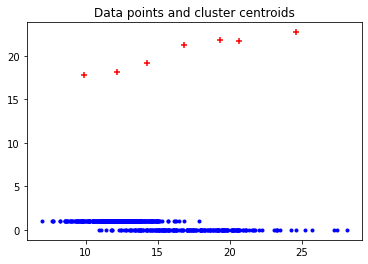

In [60]:
plt.scatter(dataset.data[:, 0], dataset.target, c='blue', marker='.')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='+')
plt.title('Data points and cluster centroids')
plt.show()

In [61]:
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(7):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]
  print(labels[mask])
labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(dataset.target, labels)

0.8840070298769771

Text(91.68, 0.5, 'predicted label')

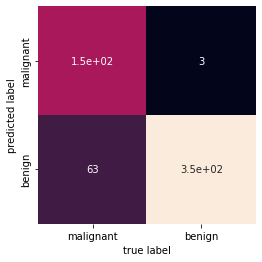

In [63]:
import seaborn as sns

mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, cbar=False, xticklabels=dataset.target_names, yticklabels=dataset.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')